In [80]:
##Output omschrijft alle audio devices, import cell.

#Civan's Laptop Speakers = Sounddevice 13
#Civan's Laptop Mic = Sounddevice 1

#Civan's Desktop Headset = Sounddevice 4
#Civan's Desktop Mic = Sounddevice 2

import sounddevice as sd
import matplotlib.pyplot as plt
import numpy as np
from mijngeluid import fft_partitioned

sd.query_devices()

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Microphone (USB Audio Device ), MME (2 in, 0 out)
   2 Microphone Array (AMD Audio Dev, MME (2 in, 0 out)
   3 Microphone (Iriun Webcam), MME (2 in, 0 out)
   4 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  5 Speakers (Realtek(R) Audio), MME (0 in, 2 out)
   6 Speakers (USB Audio Device ), MME (0 in, 2 out)
   7 Primary Sound Capture Driver, Windows DirectSound (2 in, 0 out)
   8 Microphone (USB Audio Device ), Windows DirectSound (2 in, 0 out)
   9 Microphone Array (AMD Audio Device), Windows DirectSound (2 in, 0 out)
  10 Microphone (Iriun Webcam), Windows DirectSound (2 in, 0 out)
  11 Primary Sound Driver, Windows DirectSound (0 in, 2 out)
  12 Speakers (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  13 Speakers (USB Audio Device ), Windows DirectSound (0 in, 2 out)
  14 Realtek ASIO, ASIO (2 in, 2 out)
  15 Speakers (Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  16 Speakers (USB Audio Device ), Windows

In [81]:
#Meet omstandigheden

dB = 104
fs = 44100 #sample rate, zie microfoon specificaties
duration = 4 #in seconden
arr = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float64', device=1) # neemt op in de achtergrond
sd.wait() #returns wanneer sd.rec() klaar is

In [82]:
arr.shape

(176400, 1)

Text(0, 0.5, 'Amplitude [a.u.]')

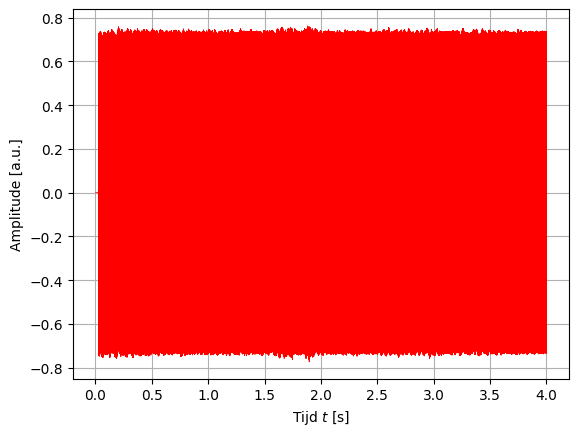

In [83]:
#Opname en weergave van de kalibrator

t = np.linspace(0, duration, int(fs*duration)) # maak (voor het gemak) een tijd as
plt.figure(dpi=100)
plt.plot(t, arr, 'r-', ms=0.5, lw=0.5)
plt.grid()
plt.xlabel(r"Tijd $t$ [s]")
plt.ylabel(r"Amplitude [a.u.]") # arbitrary units (dit is voor de kalibratie)

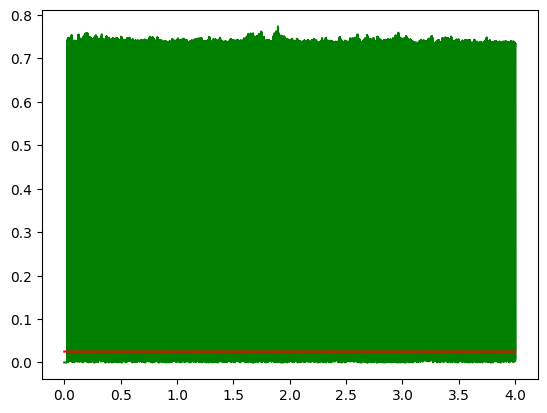

In [115]:

#De absolute waarde van de vorgie grafiek wordt genomen, zo zetten we amplitude om naar intensiteit, de eenheid is nog onbekend.
arrIntensityMic = np.absolute(arr)

#De werkelijke intensiteit wordt berekend vanuit het geselecteerde decibel niveau
arrIntensityCal = np.full(
  shape=fs*duration,
  fill_value=(10**-12)*(10**(dB/10)),
  dtype=np.float64
)

#Een grafiek wordt gemaakt van de werkelijke intensiteit en de meetintensitiet
plt.plot(t, arrIntensityMic, "g")
plt.plot(t, arrIntensityCal, "r")

#Kalibratie/Omrekenfactor voor de meetintensiteit naar de werkelijkheid
arrIntensityEcht = np.absolute(0.0452*arrIntensityMic - 0.0088)


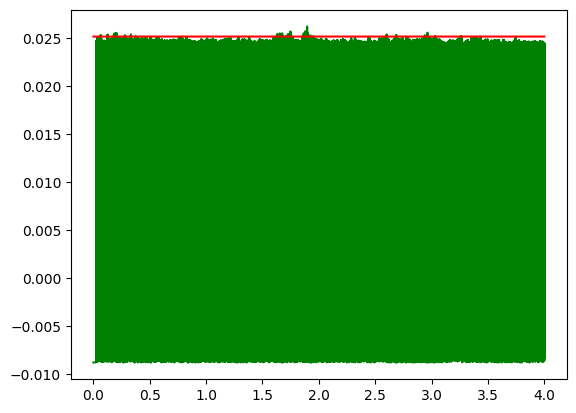

In [85]:
#grafiek van de echte intensiteit en de calibratie intensiteit
plt.plot(t, arrIntensityEcht, "g")
plt.plot(t, arrIntensityCal, "r")

In [121]:
#Intensiteit naar decibel
arrGeluidsNiveau = 10*np.log10(arrIntensityEcht/(10**-12))

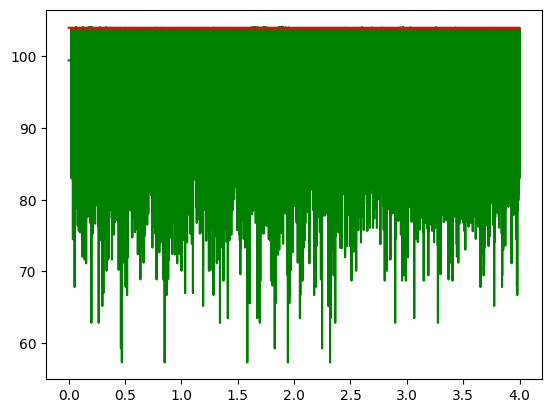

In [122]:
#array van het kalibratieniveau wordt gemaakt
arrGeluidsNiveauCal = np.full(
  shape=fs*duration,
  fill_value=dB,
  dtype=np.float64
)

#Grafiek van het gemeten geluidsniveau na kalibratie en het echte geluidsniveau in hetzelfde assenstelsel
plt.plot(t, arrGeluidsNiveau, 'g')
plt.plot(t, arrGeluidsNiveauCal, 'r')

In [ ]:
#Klaar!